Training model...
Testing model...

 [[73  1]
 [ 4 36]]

Accuracy 0.956140350877193
Precision: 0.9567961673224831
Recall: 0.956140350877193
F-1 Score: 0.956140350877193
{'fit_time': array([0.01618671, 0.01580191, 0.01638699, 0.01592588, 0.0154469 ]),
 'score_time': array([0.00504518, 0.00399709, 0.00391483, 0.00475287, 0.00392199]),
 'test_accuracy': array([0.9122807 , 0.94690265, 0.98230088, 0.96460177, 0.94690265]),
 'test_prec_macro': array([0.91447368, 0.95350877, 0.98105298, 0.96695205, 0.94315895]),
 'test_rec_macro': array([0.89583333, 0.93343394, 0.98105298, 0.95724346, 0.94315895])}


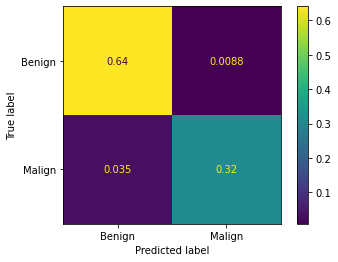

In [81]:
import pandas as pd
from scipy.stats import norm 
# Validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

# Metrics
from sklearn import metrics
from sklearn.metrics.scorer import make_scorer  
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Plotting & utils
import pprint
import matplotlib.pyplot as plt
import numpy as np

ataCsv = pd.read_csv("data/breast-cancer.csv")
dataframe = dataCsv.fillna(dataCsv.mean()).drop(
    [203, 433, 549]).drop(columns=['ID'])
dataframe['Diagnosis'].replace('M', 1, inplace=True)
dataframe['Diagnosis'].replace('B', 0, inplace=True)

X = dataframe.drop('Diagnosis', axis=1)
y = dataframe['Diagnosis']

#test_df = dataframe.sample(frac=0.5)
#test_df_pred = np.concatenate(test_df[['Diagnosis']].to_numpy(), axis=0)

#training_df = dataframe.sample(frac=0.5)
#traning_df_pred = np.concatenate(training_df[['Diagnosis']].to_numpy(), axis=0)


model = RandomForestClassifier(n_estimators=8)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("Training model...")
model = model.fit(X_train,y_train)

print("Testing model...")
y_pred = model.predict(X_test)

print("\n", metrics.confusion_matrix(y_test, y_pred))

print("\nAccuracy", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average="weighted"))
print("Recall:",metrics.recall_score(y_test, y_pred, average="weighted"))
print("F-1 Score:",f1_score(y_test, y_pred, average='micro'))


# 5-fold cross validation with multiple metrics
# See, e.g., https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'prec_macro': 'precision_macro', 
    'rec_macro': make_scorer(recall_score, average='macro')
}

scores_rf = cross_validate(model, X, y, cv=5, scoring=scoring)
pprint.pprint(scores_rf)

cm = confusion_matrix(y_test, y_pred, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Benign','Malign'])
cmd.plot()
